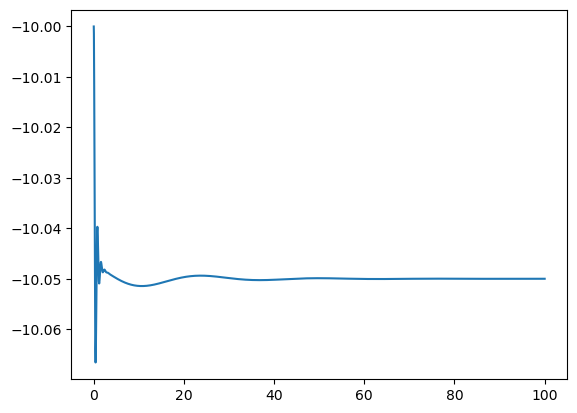

In [47]:
import control as ct
import matplotlib.pyplot as plt
import sys
from simple_pid import PID

s = ct.tf('s')

# In this script, the Load Frequency Control system of a single
# area is defined by its Transfer Function. The system converges

# Parameters
Kps, Tps = 1, 20
Kg, Tg = 1, 0.8
Kt, Tt = 1, 0.3
R = 0.05

# Transfer function of Generator
generator = Kps / (1 + Tps*s)
ref = 10

# Transfer functions of Governor and Turbine
governor = Kg / (1 + Tg*s)
turbine = Kt / (1 + Tt*s)
delta_p = 1/s

# Actuator as a combination Governor and Turbine
actuator = ct.series(governor, turbine)

# Feedback loop
droop = -1/R
Kp = -1
Ki = -0.00000001
Kd = -15
pid = Kp + Ki/s + Kd*s
#controller = ct.parallel(droop, pid)
p = ct.series(pid,governor,turbine)
q = p - delta_p
r = ct.series(q,generator)

# Interconnections
#sys1 = -ct.series(pid,governor,turbine, actuator)
single_area = ct.feedback(r, droop )-ref
#sys2 = ref + single_area


response = ct.step_response(single_area, T = 100)

plt.plot(response.time, response.outputs)

plt.show()